In [44]:
import numpy as np, cv2 as cv, math
from scipy.special import factorial
from matplotlib import pyplot as plt
from Profiler import *

line = "*"*60
line2 = "\n" + "*"*60 + "\n"

print( f"Hello... Good morning!" )
print( f"Importing was done." )

Hello... Good morning!
Importing was done.


In [60]:
@profile
def Rpq(p, q, rho, debug = 0 ) :
    if abs(q) > p : 
        print( f"Invalid argument, abs(q = {q}) < p(={p}) is not satisfied")
        return 
    pass

    if int(p - abs(q))%2 == 1 : 
        print( f"Invalid argument, p({p}) - q({q}) should be an even number.")
        return 
    pass 

    q = abs( q )

    t = max( (p - q)/2, 0 )
    s = np.arange( 0, t + 1 )
    
    R_ps = np.power( -1, s )*factorial(p - s)/factorial(s)/factorial( (p + q)/2 - s)/factorial( (p - q)/2 - s )
    rho_power = []
    
    for p_2s in p - 2*s :
        rho_power.append( np.power(rho, p_2s ) )
    pass

    rho_power = np.array( rho_power )
    
    R_pq_rho = np.inner( rho_power.T, R_ps )
    
    R_sum = np.sum( R_pq_rho )
        
    if debug : 
        print( line2 )
        print( f"p = {p}, q={q}, (p - |q|)/2 = {t}" )
        print( "s = ", s )
        print( "R_ps = ", R_ps )
        print( "rho_power shape = ", rho_power.shape )
        print( "rho_power.T shape = ", rho_power.T.shape )
        print( "rho_power = ", rho_power )
        print( "rho_power.T = ", rho_power.T )
        print( "R_pq_rho = ", R_pq_rho )    
        print( "R_sum = ", R_sum )
        print( line2 )
    pass
    
    return rho
pass

@profile
def Vpq( p, q, x, y, debug = 0 ) :
    rho = np.sqrt( x**2 + y**2 )
    
    R_pq = Rpq( p, q, rho, debug = 0 )
    
    V_pq = R_pq 
    
    if q : 
        V_pq = R_pq*np.exp( 1j*q*np.arctan2( y, x ) );
    pass    
    
    #print( "rho = ", rho )
    if debug : 
        print( f"V_pq({p}, {q}) = ", V_pq )
    pass

    return V_pq
pass

print( "Zernike functions are defined.")

from datetime import datetime
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Zernike functions are defined.
Current Time = 17:38:09


In [57]:
print( "Radial polynomail orthogonality validation" )

step = 1/1_000

rho = np.arange( 0, 1 + step, step ) 
print( f"rho = {rho}" )

debug = 1
T = 5 
for p in range( 0, T + 1 ) :
    for q in range( 0, T + 1 ) :
        for l in range( -q, q + 1 ) :
            if   ( p - abs(l) )%2 == 1 :
                continue
            elif ( q - abs(l) )%2 == 1 :
                continue
            pass
        
            r_pl = Rpq( p, l, rho, debug )
            r_ql = Rpq( q, l, rho, debug )
            
            sum = np.sum(r_pl*r_ql*rho*step)
            
            print( f"Rpl({p}, {l:2d})*Rql({q}, {l:2d}) = {sum}" )
        pass
    pass
pass

print( "Done")

Radial polynomail orthogonality validation
rho = [0.    0.001 0.002 ... 0.998 0.999 1.   ]

************************************************************

p = 0, q=0, (p - |q|)/2 = 0.0
s =  [0.]
R_ps =  [1.]
rho_power shape =  (1, 1001)
rho_power.T shape =  (1001, 1)
rho_power =  [[1. 1. 1. ... 1. 1. 1.]]
rho_power.T =  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
R_pq_rho =  [1. 1. 1. ... 1. 1. 1.]
R_sum =  1001.0

************************************************************


************************************************************

p = 0, q=0, (p - |q|)/2 = 0.0
s =  [0.]
R_ps =  [1.]
rho_power shape =  (1, 1001)
rho_power.T shape =  (1001, 1)
rho_power =  [[1. 1. 1. ... 1. 1. 1.]]
rho_power.T =  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
R_pq_rho =  [1. 1. 1. ... 1. 1. 1.]
R_sum =  1001.0

************************************************************

Rpl(0,  0)*Rql(0,  0) = 0.25050025000000004

************************************************************

p = 0, q=2, (p - |q|)/2 = 0


C:\Users\sunabove\AppData\Local\Temp/ipykernel_18996/2787425649.py:13: RuntimeWarning: divide by zero encountered in true_divide
  R_ps = np.power( -1, s )*factorial(p - s)/factorial(s)/factorial( (p + q)/2 - s)/factorial( (p - q)/2 - s )



************************************************************

p = 3, q=1, (p - |q|)/2 = 1.0
s =  [0. 1.]
R_ps =  [ 3. -2.]
rho_power shape =  (2, 1001)
rho_power.T shape =  (1001, 2)
rho_power =  [[0.00000000e+00 1.00000000e-09 8.00000000e-09 ... 9.94011992e-01
  9.97002999e-01 1.00000000e+00]
 [0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 9.98000000e-01
  9.99000000e-01 1.00000000e+00]]
rho_power.T =  [[0.00000000e+00 0.00000000e+00]
 [1.00000000e-09 1.00000000e-03]
 [8.00000000e-09 2.00000000e-03]
 ...
 [9.94011992e-01 9.98000000e-01]
 [9.97002999e-01 9.99000000e-01]
 [1.00000000e+00 1.00000000e+00]]
R_pq_rho =  [ 0.         -0.002      -0.00399998 ...  0.98603598  0.993009
  1.        ]
R_sum =  -249.49925

************************************************************


************************************************************

p = 5, q=1, (p - |q|)/2 = 2.0
s =  [0. 1. 2.]
R_ps =  [ 10. -12.   3.]
rho_power shape =  (3, 1001)
rho_power.T shape =  (1001, 3)
rho_power =  [[0.00

2021-11-28:17:02:55, INFO     [Profiler.py:0085] *** The function[ Vpq ] Average: 0.000 sec(s), Max: 0.001 sec(s), Call : 10 times. 
2021-11-28:17:02:55, INFO     [Profiler.py:0085] *** The function[ Rpq ] Average: 0.000 sec(s), Max: 0.001 sec(s), Call : 10 times. 


img shape=  (3, 3)
K = 3, H = 8, W = 8, r = 5.656854249492381
x =  [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 6 6 6 7 7 7 7
 7 7 8 8 8 8 8 8]
y =  [0 1 2 6 7 8 0 1 2 6 7 8 0 1 2 6 7 8 3 4 5 3 4 5 3 4 5 3 4 5 6 7 8 3 4 5 6
 7 8 3 4 5 6 7 8]
T = 3
V^_pq*V_pq(3, -3) =  (19.59375+0j)
V^_pq*V_pq(3, -1) =  (19.59375+0j)
V^_pq*V_pq(3, 1) =  (19.59375+0j)
V^_pq*V_pq(3, 3) =  (19.59375+0j)
V^_pq*V_pq(2, -2) =  (19.59375+0j)
V^_pq*V_pq(2, 0) =  (19.59375+0j)
V^_pq*V_pq(2, 2) =  (19.59375+0j)
V^_pq*V_pq(1, -1) =  (19.59375+0j)
V^_pq*V_pq(1, 1) =  (19.59375+0j)
V^_pq*V_pq(0, 0) =  (19.59375+0j)


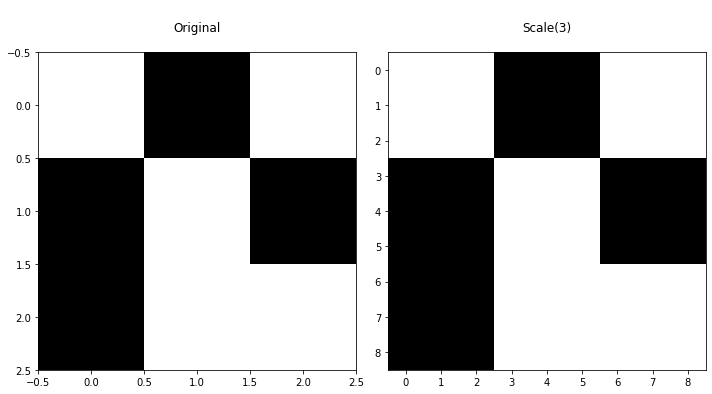

In [39]:


img = cv.imread( 'image/lenna.png', 0 )

shape = img.shape
width = 100
if shape[0] > shape[1] :
    img = cv.resize( img, (width, shape[0]*width//shape[1]) )
else :
    img = cv.resize( img, (shape[1]*width//shape[0], width) )
pass

img = np.array( [ [1, 0, 1], [0, 1, 0 ], [0, 1, 1] ], np.uint8 )

shape = img.shape
print( "img shape= ", shape )

img_org = img 

k = 3
img = cv.resize( img_org, (img_org.shape[1]*k, img_org.shape[0]*k), interpolation=cv.INTER_AREA )

h = img.shape[0] - 1
w = img.shape[1] - 1
mwh = max( h/2, w/2 )
r = math.sqrt( 2*mwh*mwh )
print( f"K = {k}, H = {h}, W = {w}, r = {r}" )
x, y = np.where( img > 0 )

if 1 : 
    print( "x = ", x[:] )
    print( "y = ", y[:] )
pass

x = (x - mwh)/r
y = (y - mwh)/r

if 0 : 
    print( "x = ", x[:] )
    print( "y = ", y[:] )
pass

T = 3
print( f"T = {T}" )
for p in range( T, -1, -1 ) : 
    for q in range( -p, p + 1 ) :
        if (p - abs(q))%2 == 0 : #짝수일 경우에만
            v_pq = Vpq( 6, 2, x, y )
            test = np.sum( v_pq*np.conjugate(v_pq) )
            #print( f"V_pq({p}, {q}) = ", v_pq )
            print( f"V^_pq*V_pq({p}, {q}) = ", test )
        pass
    pass
pass

# 서브 챠트 생성 
idx = 0 
fig, charts = plt.subplots( 1, 2, figsize=(10, 10) )
charts = charts.flatten()
chart = charts[ idx ] ; idx += 1
chart.set_title( "\nOriginal\n" )
chart.imshow( img_org, cmap='gray' )

chart = charts[ idx ] ; idx += 1
chart.set_title( f"\nScale({k})\n" )
chart.imshow( img, cmap='gray' )

print_profile()

plt.tight_layout(); plt.show()